### Лабораторная работа №4

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression
warnings.simplefilter("ignore")

In [2]:
# чтение обучающей выборки
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
    # "gender" - пол
le.fit(data.gender.drop_duplicates()) 
data.gender = le.transform(data.gender)
    # "race/ethnicity" - раса
le.fit(data["race/ethnicity"].drop_duplicates()) 
data["race/ethnicity"] = le.transform(data["race/ethnicity"])
    # "lunch" - обед
le.fit(data.lunch.drop_duplicates()) 
data.lunch = le.transform(data.lunch)
    # "parental level of education" - образование родителей
le.fit(data["parental level of education"].drop_duplicates()) 
data["parental level of education"] = le.transform(data["parental level of education"])
    # "test preparation course" - подготовительный курс
le.fit(data["test preparation course"].drop_duplicates()) 
data["test preparation course"] = le.transform(data["test preparation course"])

<AxesSubplot:>

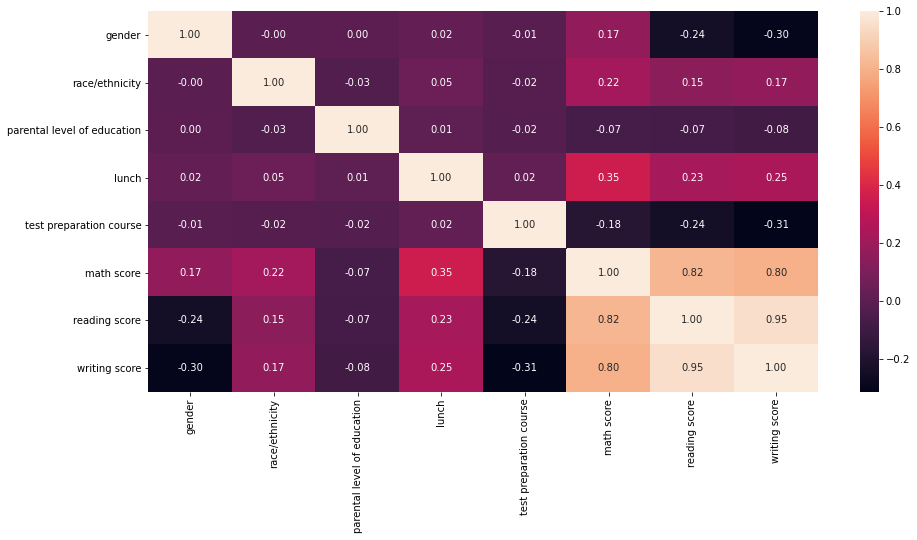

In [5]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

### Предскажем значения поля Writing score по Math score и Reading score, так как значение корреляции ближе всего к 1.

In [6]:
X = data[["math score", "reading score"]]
Y = data["writing score"]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    math score  reading score
0          72             72
1          69             90
2          90             95
3          47             57
4          76             78 

Выходные данные:

 0    74
1    88
2    93
3    44
4    75
Name: writing score, dtype: int64


In [7]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      math score  reading score
785          32             51
873          90             90
65           67             64
902          34             48
317          83             72 

Входные параметры тестовой выборки:

      math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78 

Выходные параметры обучающей выборки:

 785    44
873    82
65     61
902    41
317    78
Name: writing score, dtype: int64 

Выходные параметры тестовой выборки:

 993    74
859    72
298    50
553    64
672    76
Name: writing score, dtype: int64


### Построение линейной регрессии

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [9]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

### Возьмем тот параметр, чья корреляция ближе всего к единице, т.е. Reading score

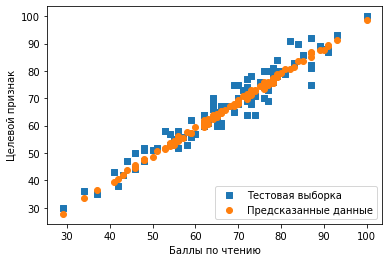

In [10]:
plt.scatter(X_test["reading score"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Баллы по чтению')
plt.ylabel ('Целевой признак')
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 2.9238888773405587
Средняя квадратичная ошибка: 13.78480852424835
Median absolute error: 2.2703383603423806
Коэффициент детерминации: 0.9287192371572706


### SVM

In [12]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

In [13]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [14]:
pred_y = svc.predict(X_test)

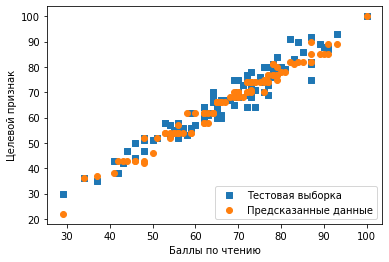

In [15]:
plt.scatter(X_test["reading score"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], pred_y, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Баллы по чтению')
plt.ylabel ('Целевой признак')
plt.show()

In [16]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, pred_y))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, pred_y))
print('Median absolute error:',       median_absolute_error(Y_test, pred_y))
print('Коэффициент детерминации:',    r2_score(Y_test, pred_y))

Средняя абсолютная ошибка: 3.81
Средняя квадратичная ошибка: 22.03
Median absolute error: 4.0
Коэффициент детерминации: 0.886083640359382


### Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [18]:
# Обучим дерево на всех признаках
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test, Y_test)

In [19]:
from IPython.core.display import HTML
from sklearn.tree.export import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

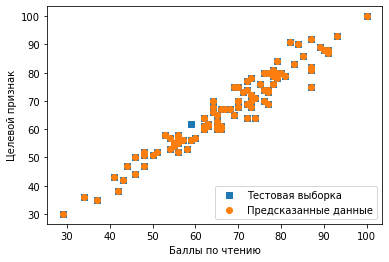

In [20]:
pred_y = clf.predict(X_test)
plt.scatter(X_test["reading score"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], pred_y, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Баллы по чтению')
plt.ylabel ('Целевой признак')
plt.show()

In [21]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, pred_y))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, pred_y))
print('Median absolute error:',       median_absolute_error(Y_test, pred_y))
print('Коэффициент детерминации:',    r2_score(Y_test, pred_y))

Средняя абсолютная ошибка: 0.06
Средняя квадратичная ошибка: 0.36
Median absolute error: 0.0
Коэффициент детерминации: 0.9981384525887144
